In [97]:
#CNN
import tensorflow as tf

In [98]:
mnist=tf.keras.datasets.mnist
# modified national institute of standards and technology database
# it has a collection of graphical images with handwriten digits
# from 0 to 9

In [99]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [100]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0


In [101]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10,activation='softmax')])

In [102]:
#x_train,x_test=x_train/255.0,x_test/255.0
# why to divide by 255
# when we are working with large data,the pixel values are integers in the range of [0,255].so,dividing it by 255.0 scales these values to the
# range of[0,1]
# working with the smaller values increase the stability of optimization algorithm

#tf.keras.layers.Dense(128,activation='relu')
# why 128
# it is the specific number of neurons or units in the dense layer.
# relu----->rectified linear unit.
# it helps to add non-linearity to our algorithm

In [103]:
model.compile(optimizer='adam',loss='sparse_catagorical_crossentropy',metrics='accuracy')

In [104]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 194, in build
        self._losses = tf.nest.map_structure(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 365, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2965, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2912, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'sparse_catagorical_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

In [105]:
#

In [106]:
#ACTIVATION FUNCTION
#relu
#it is one of the most widely used activation function .it replaces all negative values with zero.
# leading the positive values unchanged

# sigmoid
# sigmoid reduces the ouput between 0 and 1,making it suitable for binary classification problems.

# tanh() (hyperbolic tangent)
# it reduces the ouput from -1 to 1

# softmax
# it is mostly used in output layer

# leaku relu
#it is an another variant of relu function taht allows a small positive gradiant for negative values just to avoid dead neurons.


In [107]:
#PROJECT:!
#convert image to greyscale using CNN

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np


In [108]:
#load the RGB image
image_path="/content/dog.jpg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)


[[[0.14509805 0.29803923 0.1254902 ]
  [0.14117648 0.29411766 0.12156863]
  [0.09803922 0.23137255 0.08627451]
  ...
  [0.5372549  0.5568628  0.4       ]
  [0.6627451  0.69411767 0.53333336]
  [0.6784314  0.7411765  0.6       ]]

 [[0.13333334 0.2784314  0.10980392]
  [0.11764706 0.27058825 0.09803922]
  [0.08627451 0.21960784 0.07450981]
  ...
  [0.58431375 0.5921569  0.4392157 ]
  [0.54509807 0.56078434 0.41568628]
  [0.5058824  0.5568628  0.4392157 ]]

 [[0.15294118 0.2627451  0.10588235]
  [0.11372549 0.23529412 0.07450981]
  [0.08627451 0.21176471 0.06666667]
  ...
  [0.36078432 0.3764706  0.27058825]
  [0.48235294 0.4862745  0.3529412 ]
  [0.5058824  0.5411765  0.43529412]]

 ...

 [[0.827451   0.9137255  0.24705882]
  [0.50980395 0.6784314  0.01960784]
  [0.7137255  0.8901961  0.00784314]
  ...
  [0.76862746 0.8901961  0.10588235]
  [0.70980394 0.8862745  0.01176471]
  [0.6745098  0.85882354 0.01176471]]

 [[0.8509804  0.91764706 0.36862746]
  [0.5686275  0.73333335 0.00784314]


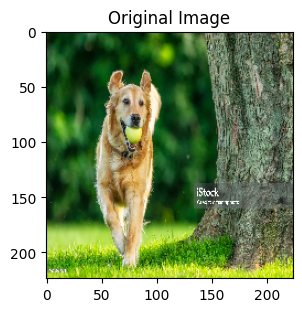

In [109]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

In [110]:
#convert image to grey scale
model=models.Sequential()

#Sequentials()---->it allow us to create alinear stack of layers in a neural network
#you can add one layer at neural network at a time and such layer has a connection only to the previous and next layer

model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))
#Conv2D---->it represent the 2D conventional layer

#CONVENTIONAL LAYER ----->used to perform element wise
#multiplications or additions or division etc.

#layers.Conv2D(1)---->1 is used to mention the number of filters is the conventional layer
# (3,3)---->set the size of the filter

# (224,224,3)------->224x224------>pixels with 3 color channel(RGB)

model.add(layers.Maxpooling2D((2,2)))
#Maxpooling2D----->it is used to set the dimensions of input data and extract important features from Conv2D layer


AttributeError: module 'keras.api._v2.keras.layers' has no attribute 'Maxpooling2D'

In [111]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
#to reshape the image
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)


1/1 [==============================] - 0s 62ms/step


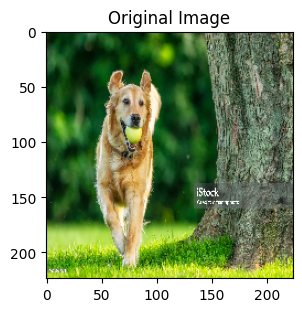

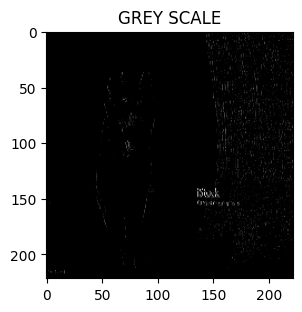

In [113]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

plt.figure(figsize=(7,7))
plt.subplot(1,2,2)
plt.title("GREY SCALE")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [115]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [128]:
#project 2
#detect flowers based on images
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib import styles
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSerachCV
# from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorial
from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,Mapooling2D,BatchNormalization
import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import zipfile
from PIL import Image




ImportError: cannot import name 'sequential' from 'keras.models' (/usr/local/lib/python3.10/dist-packages/keras/models/__init__.py)

In [121]:
X=[]
z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR=
FLOWER_SUNFLOWER_DIR=
FLOWER_TULIP_DIR=
FLOWER_DAND_DIR=
FLOWER_ROSE_DIR=


SyntaxError: invalid syntax (<ipython-input-121-29cbf6b6c54f>, line 4)

In [122]:
def assign_label(img,flower type):
  return flower_type



SyntaxError: invalid syntax (<ipython-input-122-5d3317daebc0>, line 1)

In [ ]:
#tqdm-->it creates a progress bar from the loop
 def make_train_data(flower_type,DIR)
  for img in tqdm(os.listdir(DIR))
  label=assign_label(img,flower_type)
  path=os.path.join(DIR,img)
  img=cv2.imread(path,cv2,IMREAD_COLOR)
  img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  x.append(np.array(img))
  z.append(str(label))

In [124]:
make_train_data('Daisy',FLOWER_DAISEY_DIR)
print(len(X))

NameError: name 'make_train_data' is not defined

In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(x))

In [ ]:
make_train_data('dandelion',FLOWER_DAND_DIR)
print(len(x))

In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(x))

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for row in range(5):
  for colon in range(2):
    l=rn.randint(0,len(Z))
    ax[row,col].inshow(X[1])
    ax[row,col].set_title("flower:"+Z[1])
 plt.tight_layout()